# HOUSE PRICE:Advanced Regression Techinques

### 1.Loading Python Libraries

In [1]:
# for multiple statement print
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns





### 2.Load the house Dataset:-

In [18]:
trn_df=pd.read_csv(r'C:\Users\ashis\Downloads\python_class\project_1\Kaggale_Competition\house-prices-advanced-regression-techniques\train.csv')
trn_df.head()
trn_df.shape

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


(1460, 81)

# Reverse Engineering

In [19]:
!pip install pandas-profiling

  Stored in directory: C:\Users\ashis\AppData\Local\pip\Cache\wheels\07\1c\dc\6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built imagehash
  Found existing installation: scipy 1.2.1
    Uninstalling scipy-1.2.1:
      Successfully uninstalled scipy-1.2.1


phik 0.10.0 has requirement joblib>=0.14.1, but you'll have joblib 0.14.0 which is incompatible.
Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\ashis\\anaconda3\\lib\\site-packages\\~cipy\\cluster\\_hierarchy.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



## 3.Data preparation
- 3.1 - Remove outliers
- 3.2 - Treat missing values- 

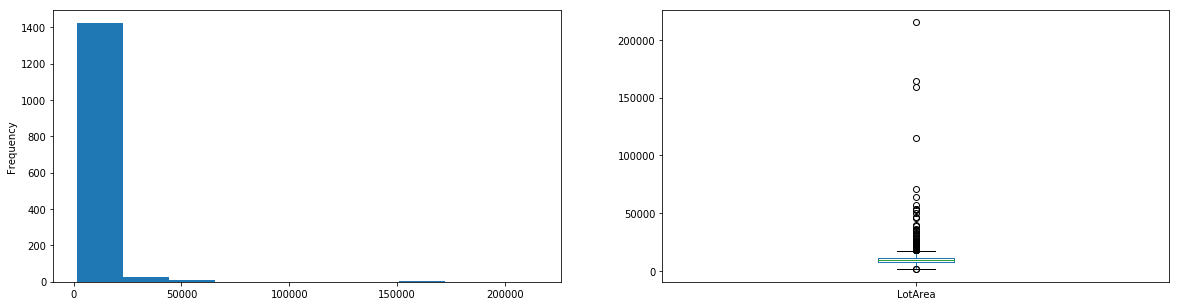

In [3]:
#3.1 - Remove outliers
plt.figure(figsize=(20 ,5))
plt.subplot(121)
trn_df['LotArea'].plot(kind = 'hist')
plt.subplot(122)
trn_df['LotArea'].plot(kind = 'box');

In [4]:
# need to remove outliers
trn_df = trn_df.drop(trn_df[trn_df['LotArea']>50000].index)

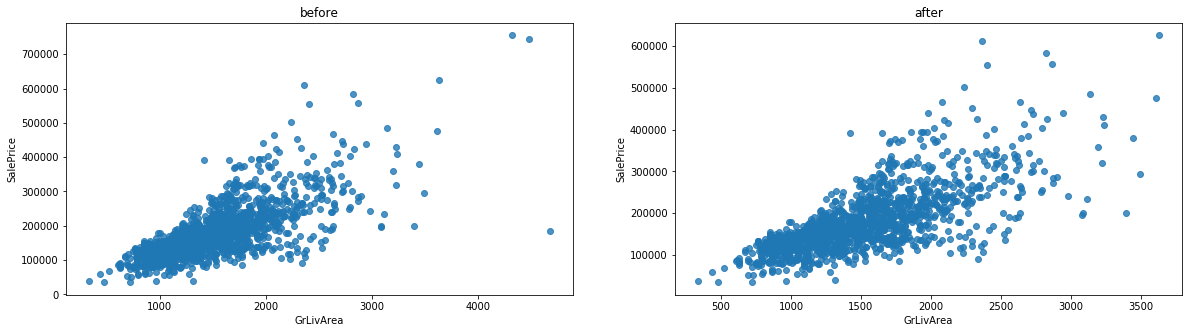

In [5]:
#3.1 - Remove outliers
plt.figure(figsize=(20 ,5))
plt.subplot(121)
sns.regplot(trn_df['GrLivArea'] ,trn_df['SalePrice'] ,fit_reg =False).set_title('before')
# Delete Outliers
plt.subplot(122)
trn_df = trn_df.drop(trn_df[trn_df['GrLivArea']>4000].index)
sns.regplot(trn_df['GrLivArea'] ,trn_df['SalePrice'] ,fit_reg =False).set_title('after');


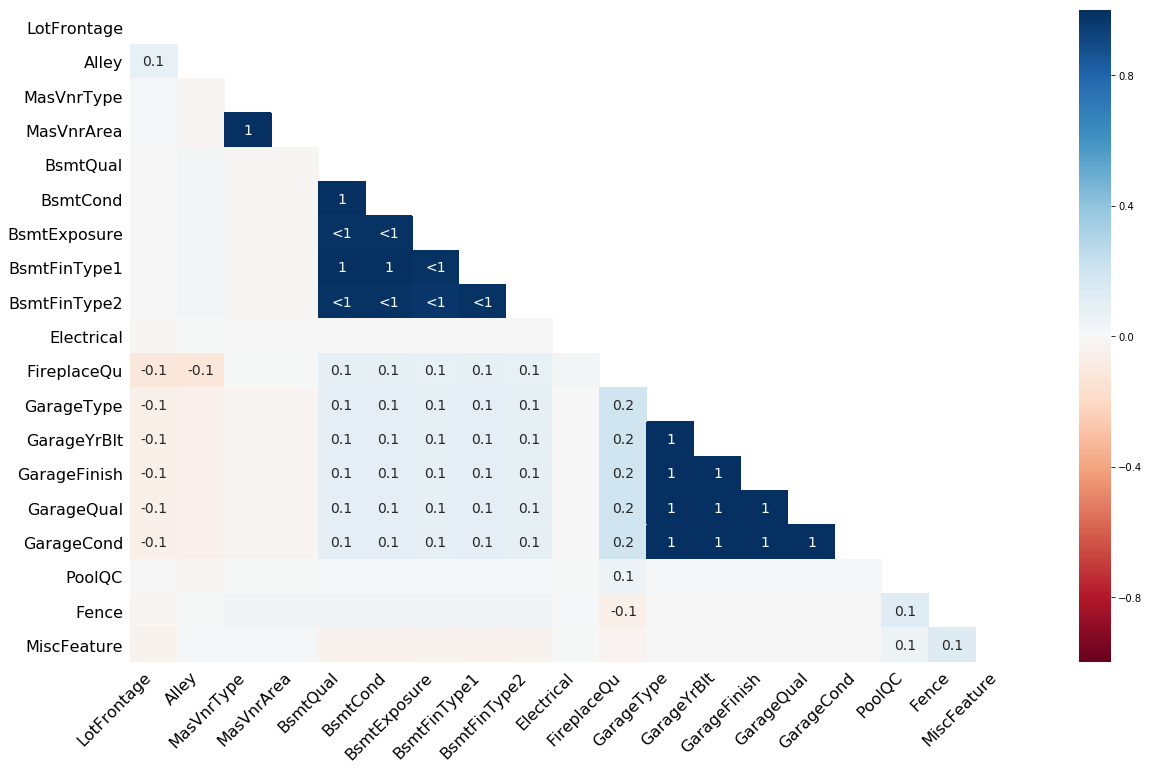

In [6]:
# TReat missing value
import missingno as msno
msno.heatmap(trn_df)

In [7]:
# Handling Missing VAlue
drop_col =[]
for i in trn_df.columns:
    if trn_df[i].isna().sum()>1300:
        drop_col.append(i)
        

In [8]:
drop_col

['Alley', 'PoolQC', 'MiscFeature']

In [9]:
trn_df.drop(trn_df[drop_col] ,axis =1 ,inplace=True)
trn_df.shape

(1446, 78)

### Filling the NAN value :
- for categorical value will use Mode()
- for Numerical Vale will use mean()
#### Identify the Categorical value and Numerical Value

In [10]:
cat = trn_df.select_dtypes(include='object').columns
len(cat)


40

In [11]:
for i in cat:
    trn_df[i] = trn_df[i].fillna(trn_df[i].mode()[0])

In [12]:
trn_df[cat].isna().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
Fence            0
SaleType         0
SaleCondition    0
dtype: int64

In [13]:
num = trn_df.select_dtypes(include=['int64' ,'float']).columns
len(num)

38

In [14]:
for i in num:
    trn_df[i] = trn_df[i].fillna(trn_df[i].mean())
trn_df[num].isna().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [15]:
trn_df.shape

(1446, 78)

In [16]:
# Label ENcoding foe categorical valu
from sklearn.preprocessing import LabelEncoder


for i in cat:
    lbl = LabelEncoder()
    trn_df[i]=lbl.fit_transform(list(trn_df[i].values))
    
trn_df.shape

(1446, 78)

In [17]:
# feauture Enginnering
x=  trn_df.drop('SalePrice',axis = 1)
y = trn_df['SalePrice']
x.shape ,y.shape

((1446, 77), (1446,))

In [76]:
from sklearn.model_selection import train_test_split

x_train ,x_test,y_train ,y_test = train_test_split(x,y,test_size=.30 , random_state = 101)
x_train.shape , y_train.shape ,x_test.shape ,y_test.shape

((1019, 77), (1019,), (437, 77), (437,))

In [78]:
import xgboost
clf = xgboost.XGBRegressor()
clf.fit(x_train ,y_train)

C:\Users\ashis\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:45:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [80]:
pred_test = clf.predict(x_test)

In [27]:
pres = pd.DataFrame(prediction)
submission =pd.read_csv(r'C:\Users\ashis\Downloads\python_class\project_1\Kaggale_Competition\house-prices-advanced-regression-techniques\sample_submission.csv')

In [28]:
submission.head()
submission.shape

,Id,SalePrice
0,1461,259839.840
1,1462,127826.445
2,1463,145342.400
3,1464,401989.600
4,1465,395268.250


(1459, 2)

In [29]:
submission_File = pd.concat([submission['Id'] ,pres] ,axis=1)
submission_File.columns = ['Id','SalePrice']
submission_File.to_csv(R'C:\Users\ashis\Downloads\python_class\project_1\Kaggale_Competition\sample_submission.csv' ,index=False)

In [30]:
submission_File.shape

(1459, 2)

In [31]:
submission_File.head()

,Id,SalePrice
0,1461,259839.843750
1,1462,127826.445312
2,1463,145342.406250
3,1464,401989.593750
4,1465,395268.250000


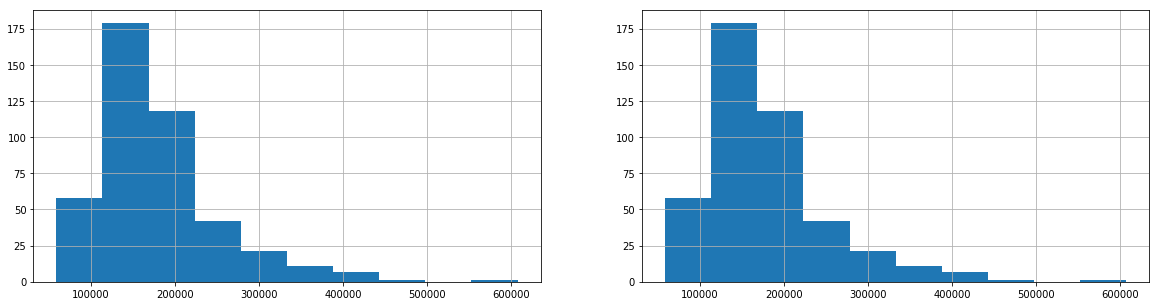

In [32]:
plt.figure(figsize=(20,5))
plt.subplot(121)
submission.SalePrice.hist()
plt.subplot(122)
submission_File.SalePrice.hist();